In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_24646_I')

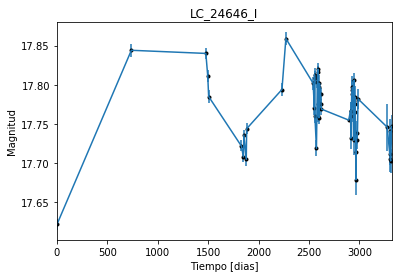

In [2]:
data = np.genfromtxt('LC_24646_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_24646_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

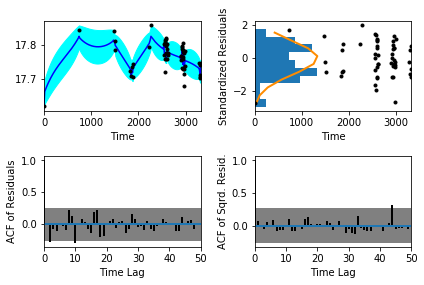

In [5]:
sample.assess_fit()

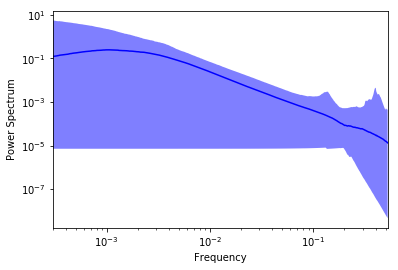

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0109225,'Medida del nivel de ruido')

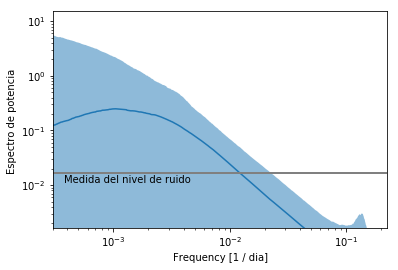

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

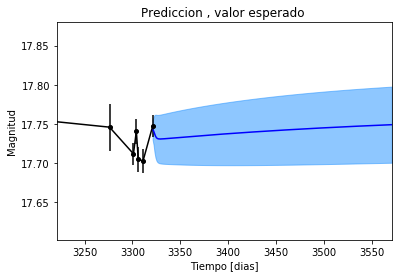

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


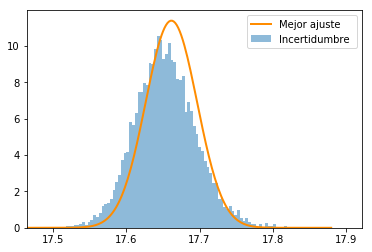

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

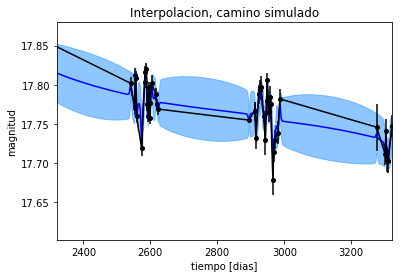

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

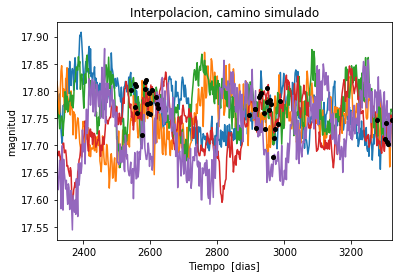

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 419.141649872
Median: 0.0205575128511
Standard deviation: 0.184189249057
68% credibility interval: [ 0.00181194  0.13315324]
95% credibility interval: [  6.45376639e-04   7.38209323e-01]
99% credibility interval: [  4.13551380e-04   1.00414441e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 508.291485134
Median: 0.0173352440944
Standard deviation: 0.123539020134
68% credibility interval: [ 0.00151835  0.08937859]
95% credibility interval: [ 0.00064538  0.47799199]
99% credibility interval: [  4.13551380e-04   8.11082860e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 431.740945184
Median: 0.0435551803043
Standard de

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 178.685153674
Median: 128.871745744
Standard deviation: 2.02260417871
68% credibility interval: [ 126.75546749  130.64274468]
95% credibility interval: [ 124.07704215  131.99182304]
99% credibility interval: [ 121.96550454  132.8380394 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 355.42068346
Median: 1.14399329515
Standard deviation: 2.53145013993
68% credibility interval: [ 0.32352929  4.70415181]
95% credibility interval: [ 0.12339104  9.25810137]
99% credibility interval: [  0.06821899  12.06979004]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 70.4867430053
Median: 12.0917794476
Standard deviation: 20.8003172657
68% credibility interval: [  1.49206081  45.94223623]
95% credibility interval: [  0.65173417  

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 777.432976479
Median: 0.00560194387781
Standard deviation: 6.88870158138e+138
68% credibility interval: [  2.57172561e-26   6.20131605e+33]
95% credibility interval: [  1.46112793e-082   2.26157964e+133]
99% credibility interval: [  7.20639555e-107   1.04855510e+138]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 827.609044097
Median: 17.764051613
Standard deviation: 0.0227427020893
68% credibility interval: [ 17.74612212  17.78291217]
95% credibility interval: [ 17.71998353  17.81192342]
99% credibility interval: [ 17.69355911  17.84260115]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 91.5881163368
Median: 0.422014539996
Standard deviation: 0.359238622802
68% credibility interval: [ 0.13528116  1.00123445]
95% credibility interval: [ 0.          1.00661724]
99% credibility interval: [ 0.          1.02751153]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 91.5881163368
Median: 0.422014539996
Standard deviation: 0.359238622802
68% credibility interval: [ 0.13528116  1.00123445]
95% credibility interval: [ 0.          1.00661724]
99% credibility interval: [ 0.          1.02751153]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 48.4841082644
Median: 0.0
Standard deviation: 0.225266683262
68% credibi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 178.685153674
Median: 128.871745744
Standard deviation: 2.02260417871
68% credibility interval: [ 126.75546749  130.64274468]
95% credibility interval: [ 124.07704215  131.99182304]
99% credibility interval: [ 121.96550454  132.8380394 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 363.37772922
Median: 0.00387565604931
Standard deviation: 0.00335670160345
68% credibility interval: [ 0.0024839   0.00749013]
95% credibility interval: [ 0.00205258  0.01372958]
99% credibility interval: [ 0.00170422  0.02087316]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 278.200059784
Median: 1.01658211188
Standard deviation: 0.226236566318
68% credibility interval: [ 0.83212676  1.26195521]
95% credibility interval: [ 0.65877847  1.55120542]
99% credibility interval: [ 0.65151584  1.77600251]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 82.3998750853
Median: 0.0246227312706
Standard deviation: 1.10423151056
68% credibility interval: [  8.68961296e-36   1.57796597e+00]
95% credibility interval: [  6.24662094e-135   2.63789427e+000]
99% credibility interval: [  6.53335399e-140   8.75327565e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 419.141649872
Median: (-0.129166662698-0.789336769411j)
Standard deviation: 2.5365559746
68% credibility interval: [-0.83662645-0.69838575j -0.01138475-6.29129742j]
95% credibility interval: [ -4.63830597e+00-6.24497489j  -4.05502102e-03-6.30749314j]
99% credibility interval: [ -6.30922540e+00-4.97883303j  -2.59841996e-03-6.2890358j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 508.291485134
Median: (-0.10892055099+3.72836038333j)
Standard deviation: 2.38690161458
68% credibility interval: [-0.56158222+1.74311675j -0.00954007+6.29735167j]
95% credibility interval: [-3.00331226+5.91877363j -0.00405502+6.30749314j]
99% credibility interval: [ -5.09618391e+00+2.71240411j  -2.59841996e-03+6.2890358j ]
Posterior summary